In [1]:
import pandas as pd

In [3]:
titanic = pd.read_csv("data/titanic.csv")

In [5]:
titanic.head()

Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500

In [15]:
air_quality = pd.read_csv(
    "data/air_quality_long.csv", index_col="date.utc", parse_dates=True
)

In [17]:
air_quality.head()

city country location parameter  value   unit
date.utc                                                                     
2019-06-18 06:00:00+00:00  Antwerpen      BE  BETR801      pm25   18.0  µg/m³
2019-06-17 08:00:00+00:00  Antwerpen      BE  BETR801      pm25    6.5  µg/m³
2019-06-17 07:00:00+00:00  Antwerpen      BE  BETR801      pm25   18.5  µg/m³
2019-06-17 06:00:00+00:00  Antwerpen      BE  BETR801      pm25   16.0  µg/m³
2019-06-17 05:00:00+00:00  Antwerpen      BE  BETR801      pm25    7.5  µg/m³

In [19]:
titanic.sort_values(by="Age").head()

Survived  Pclass                            Name     Sex   Age  \
799         1       3  Master. Assad Alexander Thomas    male  0.42   
751         1       2        Master. Viljo Hamalainen    male  0.67   
641         1       3           Miss. Eugenie Baclini  female  0.75   
466         1       3    Miss. Helene Barbara Baclini  female  0.75   
827         1       2  Master. George Sibley Richards    male  0.83   

     Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
799                        0                        1   8.5167  
751                        1                        1  14.5000  
641                        2                        1  19.2583  
466                        2                        1  19.2583  
827                        1                        1  18.7500

In [21]:
no2 = air_quality[air_quality["parameter"] == "no2"]

In [25]:
no2_subset = no2.sort_index().groupby(["location"]).head(2)


In [27]:
no2_subset

city country            location parameter  \
date.utc                                                                     
2019-04-09 01:00:00+00:00  Antwerpen      BE             BETR801       no2   
2019-04-09 01:00:00+00:00      Paris      FR             FR04014       no2   
2019-04-09 02:00:00+00:00     London      GB  London Westminster       no2   
2019-04-09 02:00:00+00:00  Antwerpen      BE             BETR801       no2   
2019-04-09 02:00:00+00:00      Paris      FR             FR04014       no2   
2019-04-09 03:00:00+00:00     London      GB  London Westminster       no2   

                           value   unit  
date.utc                                 
2019-04-09 01:00:00+00:00   22.5  µg/m³  
2019-04-09 01:00:00+00:00   24.4  µg/m³  
2019-04-09 02:00:00+00:00   67.0  µg/m³  
2019-04-09 02:00:00+00:00   53.5  µg/m³  
2019-04-09 02:00:00+00:00   27.4  µg/m³  
2019-04-09 03:00:00+00:00   67.0  µg/m³

In [29]:
no2_subset.pivot(columns="location", values="value")

location                   BETR801  FR04014  London Westminster
date.utc                                                       
2019-04-09 01:00:00+00:00     22.5     24.4                 NaN
2019-04-09 02:00:00+00:00     53.5     27.4                67.0
2019-04-09 03:00:00+00:00      NaN      NaN                67.0

In [31]:
no2.head()

city country location parameter  value   unit
date.utc                                                                 
2019-06-21 00:00:00+00:00  Paris      FR  FR04014       no2   20.0  µg/m³
2019-06-20 23:00:00+00:00  Paris      FR  FR04014       no2   21.8  µg/m³
2019-06-20 22:00:00+00:00  Paris      FR  FR04014       no2   26.5  µg/m³
2019-06-20 21:00:00+00:00  Paris      FR  FR04014       no2   24.9  µg/m³
2019-06-20 20:00:00+00:00  Paris      FR  FR04014       no2   21.4  µg/m³

<Axes: xlabel='date.utc'>

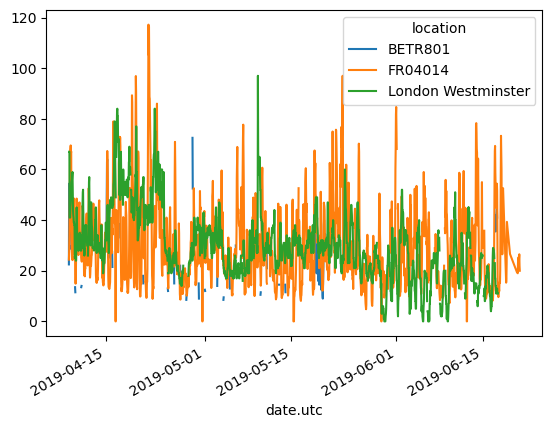

In [33]:
no2.pivot(columns="location", values="value").plot()

In [35]:
air_quality.pivot_table(
    values="value", index="location", columns="parameter", aggfunc="mean"
)

parameter                 no2       pm25
location                                
BETR801             26.950920  23.169492
FR04014             29.374284        NaN
London Westminster  29.740050  13.443568

In [37]:
air_quality.pivot_table(
    values="value",
    index="location",
    columns="parameter",
    aggfunc="mean",
    margins=True,
)

parameter                 no2       pm25        All
location                                           
BETR801             26.950920  23.169492  24.982353
FR04014             29.374284        NaN  29.374284
London Westminster  29.740050  13.443568  21.491708
All                 29.430316  14.386849  24.222743

In [39]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()

In [41]:
no2_pivoted.head()

location                  date.utc  BETR801  FR04014  London Westminster
0        2019-04-09 01:00:00+00:00     22.5     24.4                 NaN
1        2019-04-09 02:00:00+00:00     53.5     27.4                67.0
2        2019-04-09 03:00:00+00:00     54.5     34.2                67.0
3        2019-04-09 04:00:00+00:00     34.5     48.5                41.0
4        2019-04-09 05:00:00+00:00     46.5     59.5                41.0

In [43]:
no_2 = no2_pivoted.melt(id_vars="date.utc")

In [45]:
no_2.head()

date.utc location  value
0 2019-04-09 01:00:00+00:00  BETR801   22.5
1 2019-04-09 02:00:00+00:00  BETR801   53.5
2 2019-04-09 03:00:00+00:00  BETR801   54.5
3 2019-04-09 04:00:00+00:00  BETR801   34.5
4 2019-04-09 05:00:00+00:00  BETR801   46.5

In [47]:
no_2 = no2_pivoted.melt(
    id_vars="date.utc",
    value_vars=["BETR801", "FR04014", "London Westminster"],
    value_name="NO_2",
    var_name="id_location",
)

In [49]:
no_2.head()

date.utc id_location  NO_2
0 2019-04-09 01:00:00+00:00     BETR801  22.5
1 2019-04-09 02:00:00+00:00     BETR801  53.5
2 2019-04-09 03:00:00+00:00     BETR801  54.5
3 2019-04-09 04:00:00+00:00     BETR801  34.5
4 2019-04-09 05:00:00+00:00     BETR801  46.5